In [18]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import os
import warnings
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn preprocessing
from sklearn.preprocessing import RobustScaler, StandardScaler

# Scikit-learn model selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Scikit-learn pipeline
from sklearn.pipeline import Pipeline

# Scikit-learn impute
from sklearn.impute import SimpleImputer

# Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

# Scikit-learn feature
from sklearn.feature_selection import SelectKBest, f_classif

# Scikit-learn metrics
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_auc_score
)

# XGBoost
from xgboost import XGBClassifier

/kaggle/input/diabetes-dataset/diabetes.csv


In [19]:
# Load the data
data = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploring the data
# Fields and data types 🗒️:

- **Pregnancies**: To express the Number of pregnancies. `integer`
- **Glucose**: To express the Glucose level in blood. `integer`
- **BloodPressure**: To express the Blood pressure measurement. `integer`
- **SkinThickness**:  To express the thickness of the skin. `integer`
- **Insulin**: To express the Insulin level in blood. `integer`
- **BMI**: To express the Body mass index.`float`
- **DiabetesPedigreeFunction**: To express the Diabetes percentage. `float`
- **Age**: To express the age. `integer`
- **Outcome**: To express the final result 1 is Yes and 0 is No. `integer`

# Understanding Data

In [20]:
data.shape

(768, 9)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Now i going to checking the number of unique values in each column

In [22]:
dict = {}
for i in list(data.columns):
    dict[i] = data[i].value_counts().shape[0]
pd.DataFrame(dict, index=['unique count']).transpose()

,unique count
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


# Summary Statistics

In [23]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Missing Values

In [24]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# EDA (Exploratory Data Analysis)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

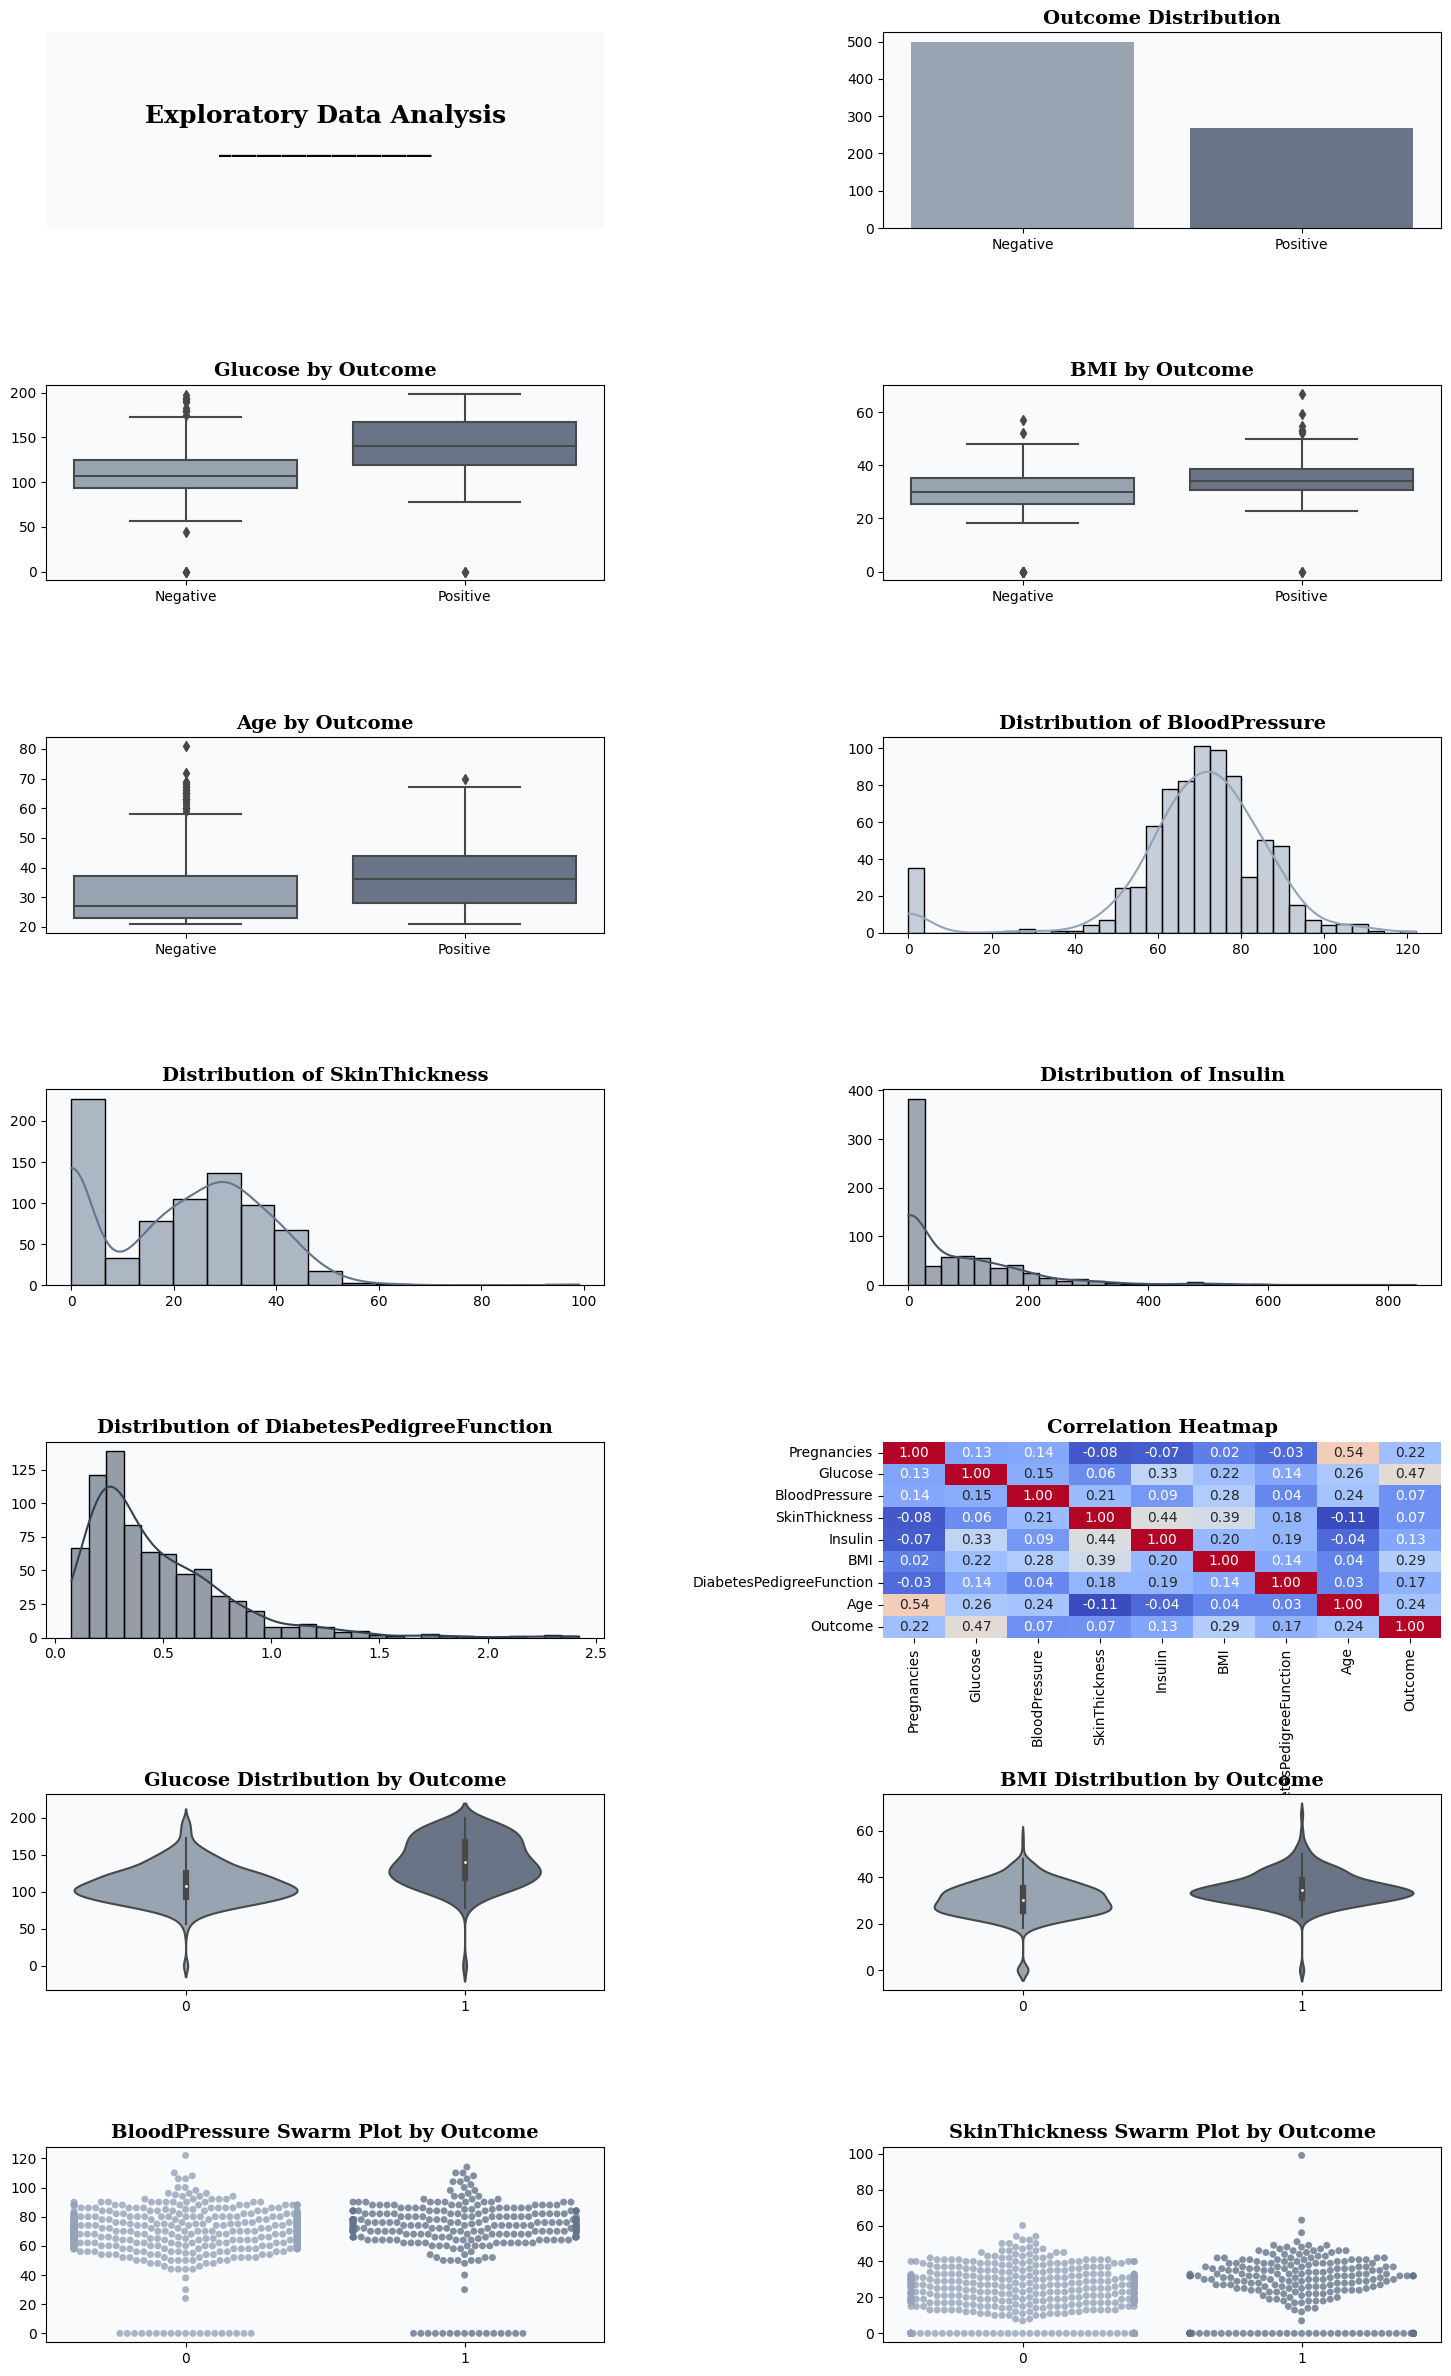

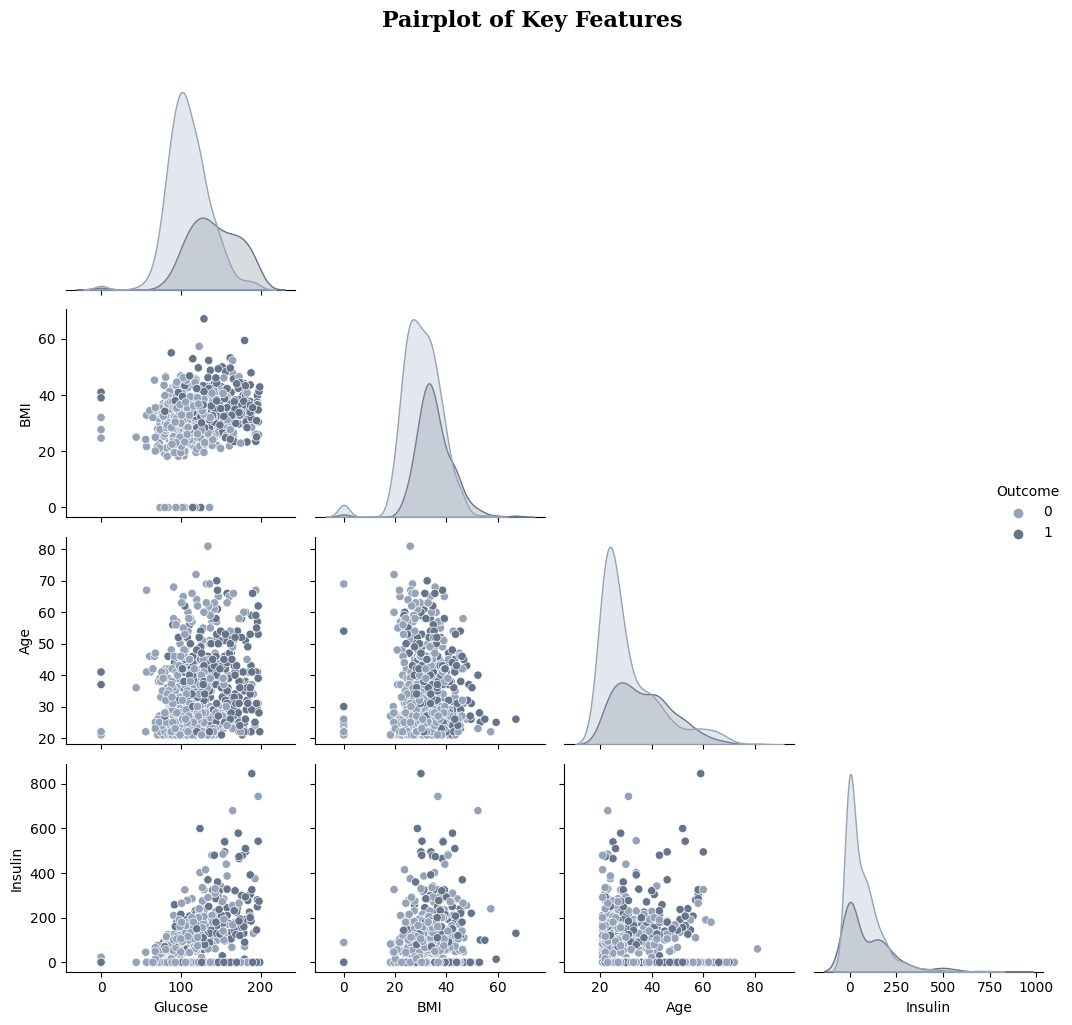

In [25]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# General plot settings
background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]

# Adjust figure size and layout
fig = plt.figure(figsize=(18, 30))
gs = fig.add_gridspec(7, 2)
gs.update(wspace=0.5, hspace=0.8)

# Create axes for subplots
axes = [fig.add_subplot(gs[i, j]) for i in range(7) for j in range(2)]
for ax in axes:
    ax.set_facecolor(background_color)

# Title for the overall analysis
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Exploratory Data Analysis\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Count plot for categorical feature 'Outcome'
sns.countplot(ax=axes[1], data=data, x='Outcome', palette=color_palette)
axes[1].set_title('Outcome Distribution', loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_xticklabels(['Negative', 'Positive'], fontsize=10)

# Boxplots for numerical vs. categorical relationships
num_features = ['Glucose', 'BMI', 'Age']
boxplot_titles = ['Glucose by Outcome', 'BMI by Outcome', 'Age by Outcome']

for i, feature in enumerate(num_features):
    ax = axes[i + 2]
    sns.boxplot(ax=ax, data=data, x='Outcome', y=feature, palette=color_palette)
    ax.set_title(boxplot_titles[i], loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(['Negative', 'Positive'], fontsize=10)

# Distribution plots for numerical features
numerical_features = ['BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction']

for i, feature in enumerate(numerical_features):
    ax = axes[i + 5]
    sns.histplot(ax=ax, data=data, x=feature, kde=True, color=color_palette[i % len(color_palette)])
    ax.set_title(f"Distribution of {feature}", loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    ax.set_xlabel("")
    ax.set_ylabel("")

# Pairplot for selected numerical features
sns.pairplot(data=data, vars=['Glucose', 'BMI', 'Age', 'Insulin'], hue='Outcome', palette=color_palette, diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Key Features", y=1.02, fontsize=16, fontweight="bold", fontfamily="serif")

# Heatmap of correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, ax=axes[9], annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
axes[9].set_title('Correlation Heatmap', loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")

# Violin plots for detailed distributions by Outcome
violin_features = ['Glucose', 'BMI']

for i, feature in enumerate(violin_features):
    ax = axes[i + 10]
    sns.violinplot(ax=ax, data=data, x='Outcome', y=feature, palette=color_palette, split=True)
    ax.set_title(f"{feature} Distribution by Outcome", loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    ax.set_xlabel("")
    ax.set_ylabel("")

# Swarm plots for finer analysis of distributions
swarm_features = ['BloodPressure', 'SkinThickness']

for i, feature in enumerate(swarm_features):
    ax = axes[i + 12]
    sns.swarmplot(ax=ax, data=data, x='Outcome', y=feature, palette=color_palette, alpha=0.8)
    ax.set_title(f"{feature} Swarm Plot by Outcome", loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



# Data Modeling

In [26]:
# Making a copy to keep original data in its form intact
data_copy = data.copy()

# Defining the independent and dependent variables
X= data_copy.drop(["Outcome"],axis =1)
y= data_copy["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

# Data preprocessing

In [27]:
# Preprocess the data by imputing zero values with NaN and then filling them with the median.
def preprocess_data(data):
    # Columns where zero values are invalid and need imputation
    zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    
    # Clone the dataset to avoid modifying the original
    processed_data = data.copy()
    
    # Replace zeros with NaN and impute using the median
    for col in zero_columns:
        processed_data[col] = processed_data[col].replace(0, np.nan)
    
    return processed_data

# Prepare features and target

In [28]:
# Separate the features (X) and the target variable (y).
def prepare_features(data):
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    return X, y

# Create a preprocessing pipeline

In [29]:
# Create a pipeline that imputes missing values and scales the data.
def create_preprocessing_pipeline():
    return Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])

# Define models to evaluate

In [30]:
# Return a dictionary of machine learning models to evaluate.
def create_models():
    return {
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'Random Forest': RandomForestClassifier(),
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(probability=True)
    }

# Hyperparameter tuning

In [31]:
# Perform hyperparameter tuning using GridSearchCV for specific models.
def perform_grid_search(X_train, y_train):
    param_grid = {
        'XGBoost': {
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'n_estimators': [100, 200]
        },
        'Random Forest': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    }
    
    best_models = {}
    for name, model in create_models().items():
        if name in param_grid:
            grid_search = GridSearchCV(
                model, 
                param_grid[name], 
                cv=5, 
                scoring='roc_auc'
            )
            grid_search.fit(X_train, y_train)
            best_models[name] = grid_search.best_estimator_
    
    return best_models

# Evaluate models

In [32]:
# Evaluate the models using accuracy and ROC AUC scores.
def evaluate_models(models, X_test, y_test):
    results = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        results[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        }
    return results

# Create an ensemble model

In [33]:
# Create a soft-voting ensemble classifier using the best individual models.
def create_voting_classifier(models):
    estimators = list(models.items())
    return VotingClassifier(
        estimators=estimators, 
        voting='soft'
    )

In [36]:
def main():
    # Preprocess the data
    processed_data = preprocess_data(data)
    
    # Prepare features and target
    X, y = prepare_features(processed_data)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Create and apply the preprocessing pipeline
    preprocessor = create_preprocessing_pipeline()
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    
    # Perform hyperparameter tuning
    best_models = perform_grid_search(X_train_processed, y_train)
    
    # Evaluate individual models
    model_results = evaluate_models(best_models, X_test_processed, y_test)
    
    # Create and evaluate the ensemble model
    voting_classifier = create_voting_classifier(best_models)
    voting_classifier.fit(X_train_processed, y_train)
    
    ensemble_accuracy = accuracy_score(
        y_test, 
        voting_classifier.predict(X_test_processed)
    )
    
    # Print results
    print("Individual Model Results:")
    for name, metrics in model_results.items():
        print(f"{name}: {metrics}")
    
    print(f"\nEnsemble Accuracy: {ensemble_accuracy}")

# Execute the script
if __name__ == "__main__":
    main()

Individual Model Results:
XGBoost: {'Accuracy': 0.7272727272727273, 'ROC AUC': 0.8106519742883379}
Random Forest: {'Accuracy': 0.7467532467532467, 'ROC AUC': 0.8339761248852158}

Ensemble Accuracy: 0.7337662337662337
